In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Let us start with the 1D SSH Model

In [3]:
#first case with nearest neighbor hopping

# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, 0.0])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])



In [4]:
def get_H_k(k):
    R = np.array([-1, 0, 1])
    phase = np.exp(1j * k * R)
    
    H_k = np.zeros((2, 2), dtype=complex)
    
    H_k[0, 0] = np.sum(Haa * phase)  # Haa(k)
    H_k[0, 1] = np.sum(Hab * phase)  # Hbb(k)
    H_k[1, 0] = np.sum(Hba * phase)  # Hba(k)
    H_k[1, 1] = np.sum(Hbb * phase)  # Hbb(k)
    
    return H_k

In [5]:
#JUST TESTING TO SEE IF IT MAKES SENSE
test_k_points = [-np.pi, 0, np.pi]
for k in (test_k_points):
    H = get_H_k(k)
    print(f"\n{k}")
    print(H)
    
    is_hermitian = np.allclose(H, H.conj().T)
    if is_hermitian:
        print("The Hamiltonian is Hermitian.")
    else:
        print("The Hamiltonian is NOT Hermitian.")


-3.141592653589793
[[ 0.1+0.00000000e+00j -0.3+8.57252759e-17j]
 [-0.3-8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.

0
[[0.1+0.j 1.1+0.j]
 [1.1+0.j 0.1+0.j]]
The Hamiltonian is Hermitian.

3.141592653589793
[[ 0.1+0.00000000e+00j -0.3-8.57252759e-17j]
 [-0.3+8.57252759e-17j  0.1+0.00000000e+00j]]
The Hamiltonian is Hermitian.


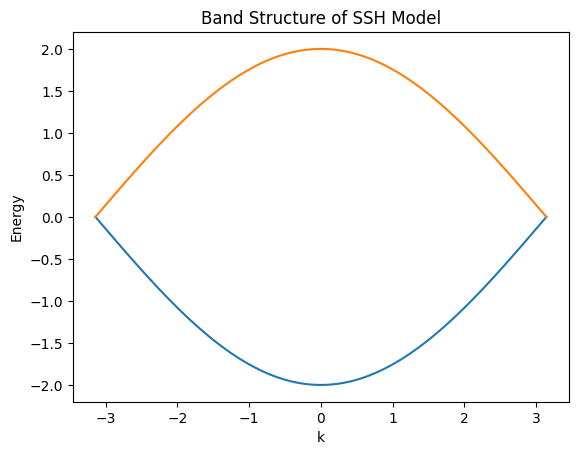

In [6]:
def plot_band_structure(k_points):
    upper_eigenvalues = []
    lower_eigenvalues = []
    for k in k_points:
        H_k = get_H_k(k)
        lower_evals, upper_evals = np.linalg.eigvalsh(H_k)
        lower_eigenvalues.append(lower_evals)
        upper_eigenvalues.append(upper_evals)

    plt.plot(k_points, lower_eigenvalues, label='Lower Band')
    plt.plot(k_points, upper_eigenvalues, label='Upper Band')
    plt.xlabel('k')
    plt.ylabel('Energy')
    plt.title('Band Structure of SSH Model')
    plt.show()

#first case with nearest neighbor hopping
# The indices correspond to R = [-1, 0, 1]
Haa = np.array([0.0, 0.0, 0.0])
Hbb = np.array([0.0, 0.0, 0.0])
Hab = np.array([1.0, 1.0, 0.0])
Hba = np.array([0.0, 1.0, 1.0])
H_r = np.array([Haa, Hab, Hba, Hbb])
k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

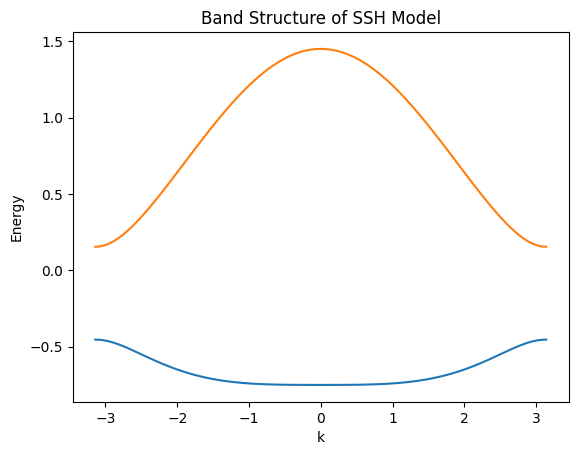

In [7]:
#now let us add in nearest neighbour hopping

# The indices correspond to R = [-1, 0, 1]
next_nearest_hopping_aa = 0.2
next_nearest_hopping_bb = 0.3

Haa = np.array([next_nearest_hopping_aa, 0.1, 0.0])
Hbb = np.array([0.0, 0.1, next_nearest_hopping_bb])
Hab = np.array([0.7, 0.4, 0.0])
Hba = np.array([0.0, 0.4, 0.7])

# Each row represents a matrix element type [aa, ab, ba, bb]
# Each column represents a unit cell index R = [-1, 0, 1]
H_r = np.array([Haa, Hab, Hba, Hbb])

k_points = np.linspace(-np.pi, np.pi, 100)
plot_band_structure(k_points)

# Now Let us try a 2D Model

In [8]:
#first case with nearest neighbor hopping
# this is disgusting but I do not want to rework it lol

# Each array is 3x3: rows/cols correspond to R_x = [-1,0,1], R_y = [-1,0,1]
Haa = np.array([[0.0, 0.0, 0.0],
               [0.0, 0.1, 0.0],
               [0.0, 0.0, 0.0]])

Hbb = np.array([[0.0, 0.0, 0.0],
               [0.0, 0.1, 0.0],
               [0.0, 0.0, 0.0]])

Hab = np.array([[0.0, 0.0, 0.0],
               [0.7, 0.4, 0.0],
               [0.0, 0.7, 0.0]])

Hba = np.array([[0.0, 0.7, 0.0],
               [0.0, 0.4, 0.7],
               [0.0, 0.0, 0.0]])

def get_H_k_2D(kx, ky):
    x = np.array([-1, 0, 1])
    y = np.array([-1, 0, 1])
    H_k = np.zeros((2, 2), dtype=complex)
    # 2D grid of R = (rx, ry)
    # compute phase factor for each entry
    rX, rY = np.meshgrid(x, y, indexing='ij')
    phase = np.exp(1j * (kx * rX + ky * rY))

    H_k[0, 0] = np.sum(Haa * phase)
    H_k[0, 1] = np.sum(Hab * phase)
    H_k[1, 0] = np.sum(Hba * phase)
    H_k[1, 1] = np.sum(Hbb * phase)

    return H_k

H_k_test = get_H_k_2D(0.0, 0.0)
print(H_k_test)

[[0.1+0.j 1.8+0.j]
 [1.8+0.j 0.1+0.j]]


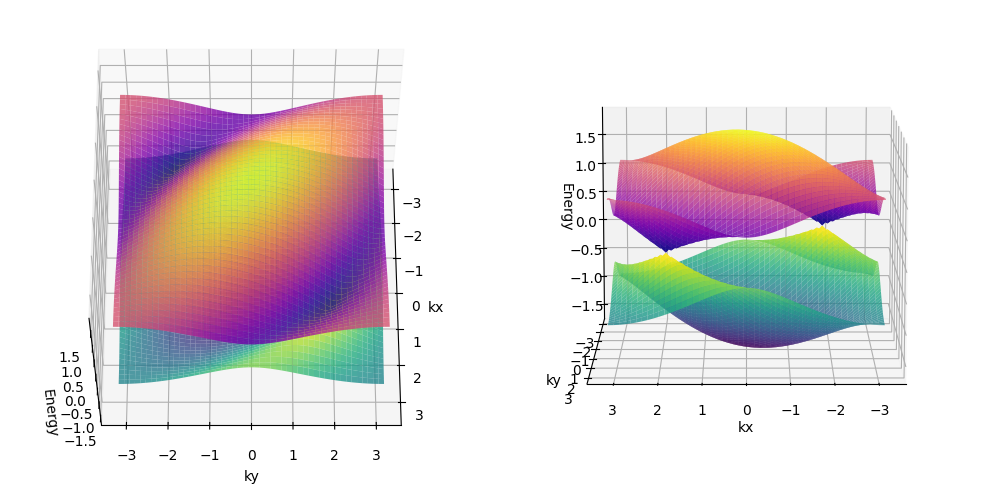

In [9]:
def plot_2D(kx_points, ky_points):
    kX, kY = np.meshgrid(kx_points, ky_points)
    lower_eigenvalues = np.zeros_like(kX)
    upper_eigenvalues = np.zeros_like(kX)
    for i, kx in enumerate(kx_points):
        for j, ky in enumerate(ky_points):
            H_k = get_H_k_2D(kx, ky)
            evals = np.linalg.eigvalsh(H_k)
            lower_eigenvalues[j, i] = evals[0]
            upper_eigenvalues[j, i] = evals[1]

    fig = plt.figure(figsize=(15, 5))

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(kX, kY, lower_eigenvalues, cmap='viridis', alpha=0.8)
    ax2.plot_surface(kX, kY, upper_eigenvalues, cmap='plasma', alpha=0.8)
    ax2.view_init(elev=60, azim=0)
    ax2.set_xlabel('kx')
    ax2.set_ylabel('ky')
    ax2.set_zlabel('Energy')

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(kX, kY, lower_eigenvalues, cmap='viridis', alpha=0.8)
    ax3.plot_surface(kX, kY, upper_eigenvalues, cmap='plasma', alpha=0.8)
    ax3.view_init(elev=10, azim=90)
    ax3.set_xlabel('kx')
    ax3.set_ylabel('ky')
    ax3.set_zlabel('Energy')

    plt.tight_layout()
    plt.show()


kx_points, ky_points = np.linspace(-np.pi, np.pi, 50), np.linspace(-np.pi, np.pi, 50)
plot_2D(kx_points, ky_points)

# Practical 2

In [10]:
def new_get_H_k(k, v, w):
    Haa = np.array([0.0, 0.0, 0.0])
    Hbb = np.array([0.0, 0.0, 0.0])
    Hab = np.array([w, v, 0.0])
    Hba = np.array([0.0, v, w])
    R = np.array([-1, 0, 1])
    phase = np.exp(1j * k * R)
    
    H_k = np.zeros((2, 2), dtype=complex)
    
    H_k[0, 0] = np.sum(Haa * phase)  # Haa(k)
    H_k[0, 1] = np.sum(Hab * phase)  # Hbb(k)
    H_k[1, 0] = np.sum(Hba * phase)  # Hba(k)
    H_k[1, 1] = np.sum(Hbb * phase)  # Hbb(k)
    
    return H_k

def ground_state(k, v, w):
    H_k = new_get_H_k(k, v, w)
    evecs = np.linalg.eigh(H_k)[1]
    ground_state_vector = evecs[:, 0]
    return ground_state_vector

def discrete_berry_phase(k_points, v, w):
    berry_phase = 0.0
    num_k = len(k_points)
    for i in range(num_k):
        k_current = k_points[i]
        k_next = k_points[(i + 1) % num_k]
        #note the cyclic boundary condition

        groundstate_current = ground_state(k_current, v, w)
        groundstate_next = ground_state(k_next, v, w)
        overlap = np.vdot(groundstate_current, groundstate_next)
        berry_phase += np.angle(overlap)
    return berry_phase

In [11]:
#first case with nearest neighbor hopping
v= 0.6
w= 1.0

'''
Haa = np.array([0.0, 0.0, 0.0])
Hbb = np.array([0.0, 0.0, 0.0])
Hab = np.array([w, v, 0.0])
Hba = np.array([0.0, v, w])
'''

k_points = np.linspace(-np.pi, np.pi, 100)
berry_phase = discrete_berry_phase(k_points, v, w)
print(f"Berry phase: {berry_phase}")

def winding_number(berry_phase):
    return int(np.round(berry_phase / np.pi))

print(f"Winding number: {winding_number(berry_phase)}")

Berry phase: 3.1415926535897944
Winding number: 1


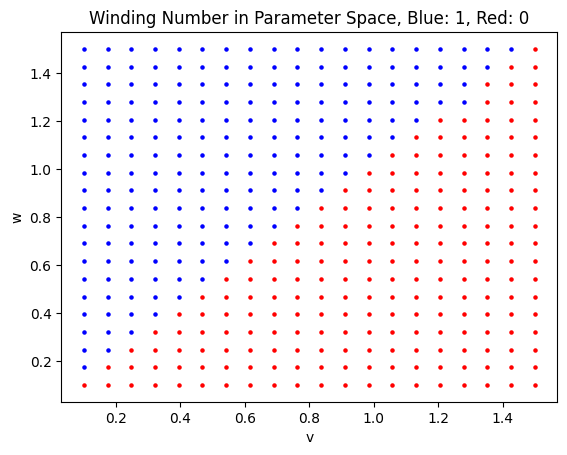

In [13]:
#Visualisation of Berry phase winding

v_range = np.linspace(0.1, 1.5, 20)
w_range = np.linspace(0.1, 1.5, 20)

def plot_berry_phase_winding(v_range, w_range):
    for v in v_range:
        for w in w_range:
            k_points = np.linspace(-np.pi, np.pi, 100)
            berry_phase = discrete_berry_phase(k_points, v, w)
            wn = winding_number(berry_phase)
            plt.scatter(v, w, c='blue' if wn == 1 else 'red', s=5)
    plt.xlabel('v')
    plt.ylabel('w')
    plt.title('Winding Number in Parameter Space, Blue: 1, Red: 0')
    plt.show()

plot_berry_phase_winding(v_range, w_range)

# Optional Task
Finite SSH Model

In [ ]:
H_atomic_for_two = np.array([
                    [0, v, 0.0, 0.0],
                    [w, v, w, 0.0],
                    [0.0, w, v, w],
                    [0.0, 0.0, w, v]])

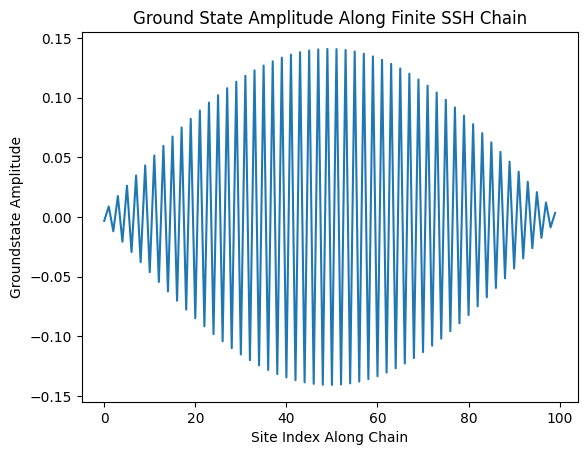

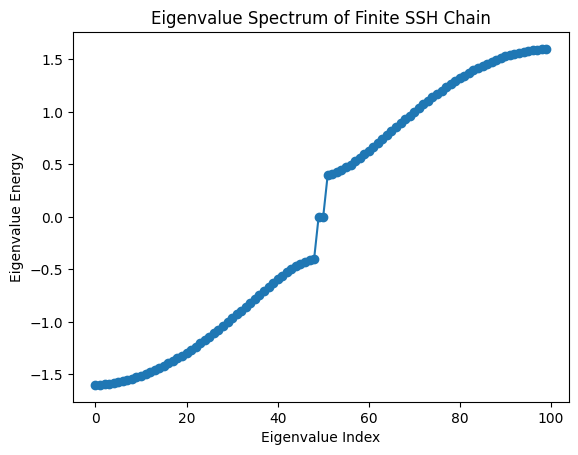

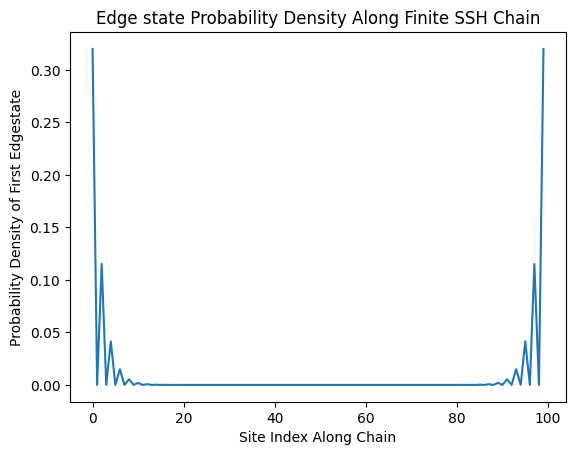

In [61]:
v = 0.6
w = 1.0

#example
H_example = np.array([
                     [0, v, 0,],
                     [v, 0, w,],
                     [0, w, 0]])


def create_tridiagonal_pattern(n):
    H = np.zeros((n, n))
    
    for i in range(n - 1):
        if i % 2 == 0:
            # Even index use v
            H[i, i + 1] = v
            H[i + 1, i] = v
        else:
            # Odd index use w
            H[i, i + 1] = w
            H[i + 1, i] = w
    
    return H


N = 100
H_atomic = create_tridiagonal_pattern(N)
#print(H_atomic)
eigenvalues, eigenvectors = np.linalg.eigh(H_atomic)
groundstate = eigenvectors[:, 0]
length_along_chain = np.arange(len(groundstate))

plt.plot(length_along_chain, groundstate)
plt.xlabel('Site Index Along Chain')
plt.ylabel('Groundstate Amplitude')
plt.title('Ground State Amplitude Along Finite SSH Chain')
plt.show()

plt.plot(np.arange(len(eigenvalues)), eigenvalues, 'o-')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue Energy')
plt.title('Eigenvalue Spectrum of Finite SSH Chain')
plt.show()

edge_state_ind = np.where(np.abs(eigenvalues) < 1e-5)[0]
first_edgestate = eigenvectors[:, edge_state_ind[0]]
plt.plot(np.arange(len(first_edgestate)), np.abs(first_edgestate)**2)
plt.xlabel('Site Index Along Chain')
plt.ylabel('Probability Density of First Edgestate')
plt.title('Edge state Probability Density Along Finite SSH Chain')
plt.show()
